In [1]:
library(dplyr)      |> suppressPackageStartupMessages()
library(readr)      |> suppressPackageStartupMessages()
library(bnlearn)    |> suppressPackageStartupMessages()
library(bnstruct)   |> suppressPackageStartupMessages()
library(Rgraphviz)  |> suppressPackageStartupMessages()
library(foreach)    |> suppressPackageStartupMessages()
library(doParallel) |> suppressPackageStartupMessages()
library(ggplot2)    |> suppressPackageStartupMessages()
library(tidyr)      |> suppressPackageStartupMessages()
library(purrr)      |> suppressPackageStartupMessages()

source("./K2algo.R")

## Datasets and DAGs

### Ruiz dataset

In [2]:
records <- c(1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0)
ruiz_example  <- data.frame(matrix(records, 10,3, byrow=TRUE))

ruiz_example

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1


In [3]:
print(scoring_function(ruiz_example, "X3", c()))
print(log_scoring_function(ruiz_example, "X3", c()))

[1] 0.0004329004
[1] -7.745003


In [4]:
res <- K2_pipeline(ruiz_example, max_parents=3, max_iter=1)
print(paste("Score: ", res$score))

[1] "Score:  -23.3137121136653"


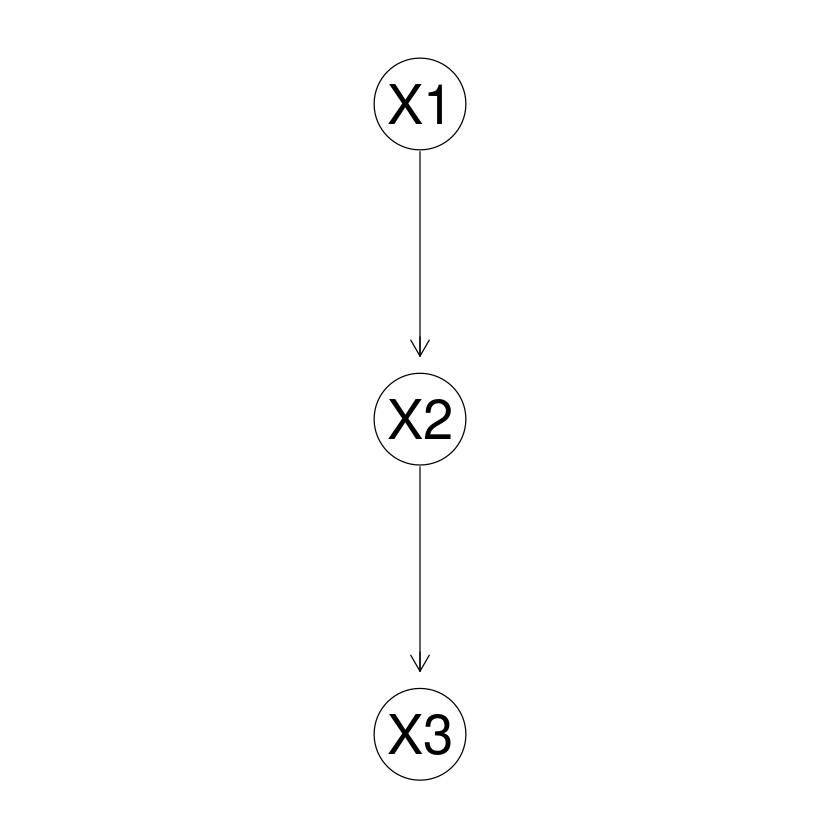

In [5]:
dag <- res$dag
graphviz.plot(dag, shape="circle")

### Child dataset

In [18]:
# Load the data
child_df <- child() |> # S4 object
  impute() |> # Impute the dataset to remove missing values
  imputed.data() |> # Extract the imputed dataset
  as.data.frame() # Convert to a data frame

# Set the column names
colnames(child_df) <- child()@variables
print(colnames(child_df))

head(child_df)

bnstruct :: performing imputation ...



bnstruct :: imputation finished.



 [1] "BirthAsphyxia"  "Disease"        "Age"            "LVH"           
 [5] "DuctFlow"       "CardiacMixing"  "LungParench"    "LungFlow"      
 [9] "Sick"           "HypDistrib"     "HypoxiaInO2"    "CO2"           
[13] "ChestXray"      "Grunting"       "LVHReport"      "LowerBodyO2"   
[17] "RUQO2"          "CO2Report"      "XrayReport"     "GruntingReport"


,BirthAsphyxia,Disease,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHReport,LowerBodyO2,RUQO2,CO2Report,XrayReport,GruntingReport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,3,2,1,3,1,1,2,1,1,1,1,2,2,2,3,2,1,2
2,2,4,2,1,1,2,1,2,2,1,2,1,2,2,1,2,2,1,2,2
3,2,3,1,2,1,3,1,2,2,1,2,2,2,2,2,1,2,1,2,2
4,2,4,1,1,1,3,1,1,2,1,3,1,1,2,1,3,1,1,1,2
5,2,2,1,2,2,4,1,1,1,1,3,1,1,2,2,1,1,1,2,2
6,2,2,1,2,1,4,1,3,2,1,3,1,3,2,2,2,1,1,3,2


In [19]:
#res <- K2_to_dag(child_df, max_parents=3)
res <- K2_pipeline(child_df, max_parents=3, max_iter=3)
print(paste("Score: ", res$score))

[1] "Score:  -79690.8041605567"


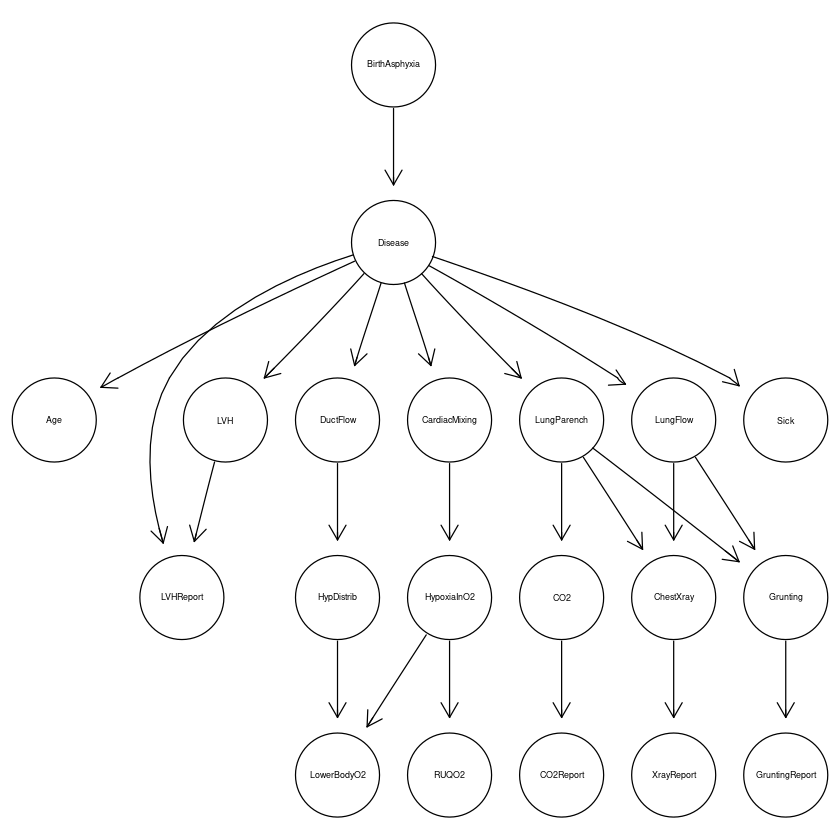

In [20]:
dag <- res$dag
graphviz.plot(dag, shape="circle")

### Asia dataset

In [21]:
asia_df <- asia() |> # S4 object
  impute() |> # Impute the dataset to remove missing values
  imputed.data() |> # Extract the imputed dataset
  as.data.frame() # Convert to a data frame

# Set the column names
colnames(asia_df) <- asia()@variables
print(colnames(asia_df))

head(asia_df)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



[1] "Asia"         "Tubercolosys" "Smoke"        "LungCancer"   "Bronchitis"  
[6] "Either"       "X-ray"        "Dyspnea"     


,Asia,Tubercolosys,Smoke,LungCancer,Bronchitis,Either,X-ray,Dyspnea
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,1,1,1,2,1,2
2,2,1,1,1,1,1,2,1
3,1,1,2,1,1,1,2,1
4,2,1,2,1,1,1,2,1
5,2,1,2,1,1,1,1,2
6,2,1,2,1,1,1,2,2


In [22]:
#res <- K2_to_dag(asia_df, max_parents=3)
res <- K2_pipeline(asia_df, max_parents=3, max_iter=3)
print(paste("Score: ", res$score))

[1] "Score:  26592.7731674619"


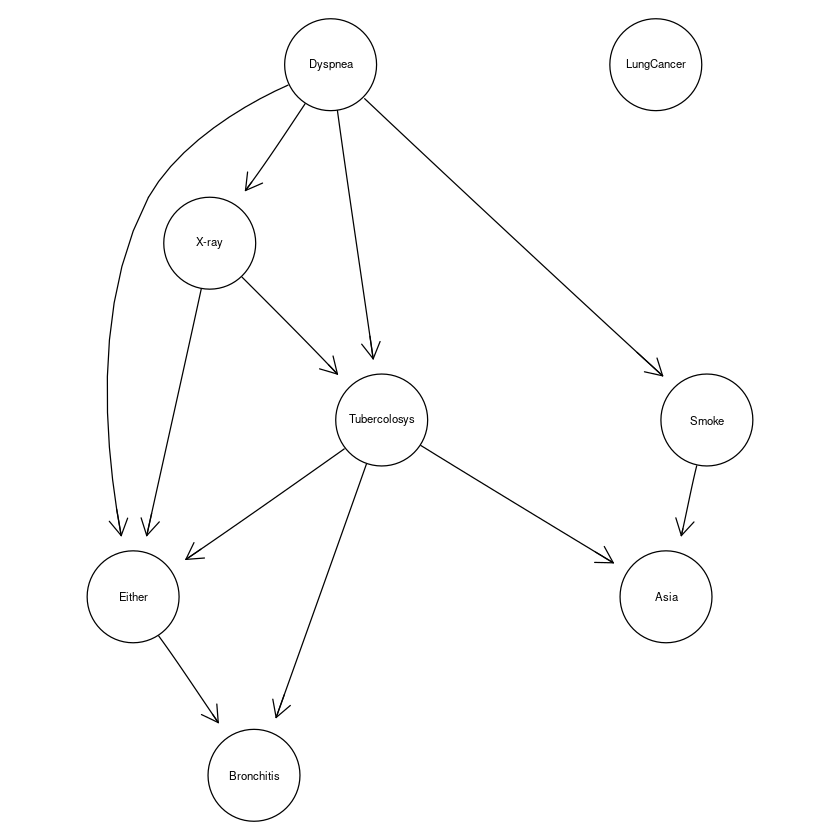

In [23]:
dag <- res$dag
graphviz.plot(dag, shape="circle")

### SACHS

In [24]:
sachs_df <- read_csv('https://www.ccd.pitt.edu/wiki/images/SACHS10k.csv', show_col_types = FALSE)
head(sachs_df)

Akt,Erk,Jnk,Mek,P38,PIP2,PIP3,PKA,PKC,Plcg,Raf
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1,2,2,3,1,1
1,2,1,1,2,1,2,2,2,1,1
1,1,3,1,3,2,2,1,1,3,3
1,2,1,1,1,1,3,3,1,1,2
1,2,1,1,1,1,3,2,2,2,1
1,2,2,2,1,1,1,2,2,1,2


In [25]:
#res <- K2_to_dag(sachs_df, max_parents=3)
res <- K2_pipeline(sachs_df, max_parents=3, max_iter=3)
print(paste("Score: ", res$score))

[1] "Score:  -95015.0531421494"


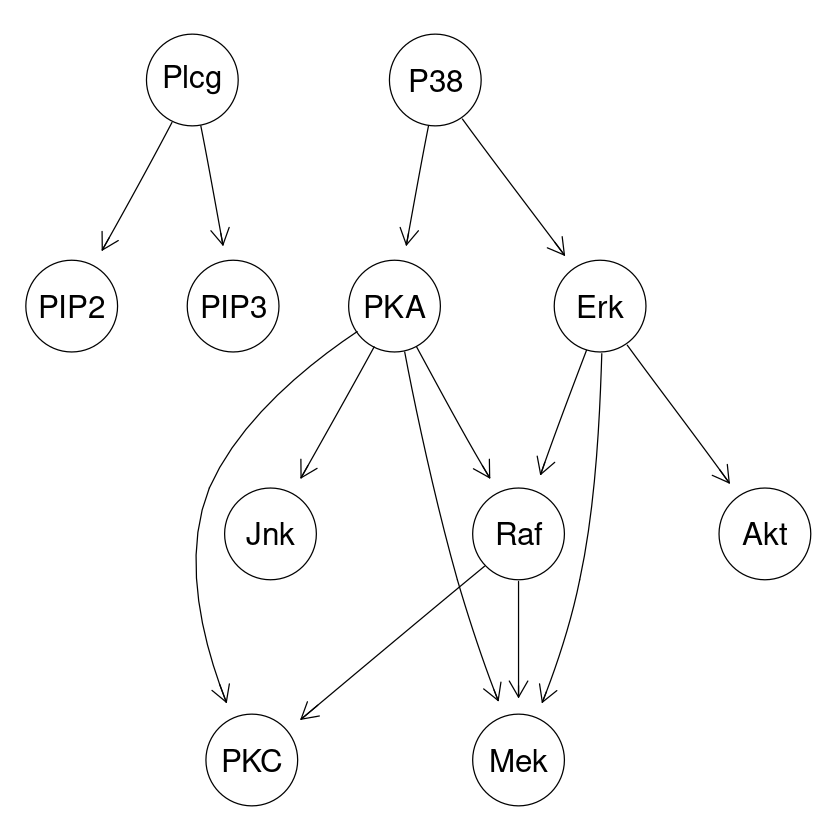

In [26]:
dag <- res$dag
graphviz.plot(dag, shape="circle")

## Comparisons and Analysis

In [27]:
datasets <- list(
  asia = asia_df,
  child = child_df,
  sachs = sachs_df
)

### Number of iterations

In [29]:
# Helper function to get the rescaled history from a dataset
get_rescaled_history <- function(data, iters){
  res <- K2_pipeline(data, max_parents=3, max_iter=iters, mode="local", return_history=TRUE)
  hist <- res$history
  if (min(hist) == max(hist)){
    hist <- array(data = 1, dim = c(iters))
  } else {
    hist <- (hist - min(hist)) / (max(hist) - min(hist))
  }
  return(hist)
}

In [30]:
n_realizations <- 5

# Create the long-format data frame
results <- map2_df(
  names(datasets), datasets,
  ~ {
    # Loop over each realization
    map_df(1:n_realizations, function(realization_id) {
      # Generate the time series scores
      hist <- get_rescaled_history(.y, 15)
      
      # Create a data frame for the current realization
      data.frame(
        dataset_id = .x,               # The name of the current dataset
        realization_id = realization_id, # Current realization index
        time_point = seq_along(hist), # Iterations
        score = hist            # The scores for each time point
      )
    })
  }
)

# Save the data frame to an RDS file
saveRDS(results, file = "./temp_data/convergenceK2.rds")

In [49]:
# Load the data frame from the RDS file
results <- readRDS("./temp_data/convergenceK2.rds")

In [42]:
# Summarize the results
summary_stats <- results |>
  group_by(dataset_id, time_point) |>
  summarize(
    mean_score = mean(score),
    sd_score = sd(score),
    .groups = 'drop'
  )

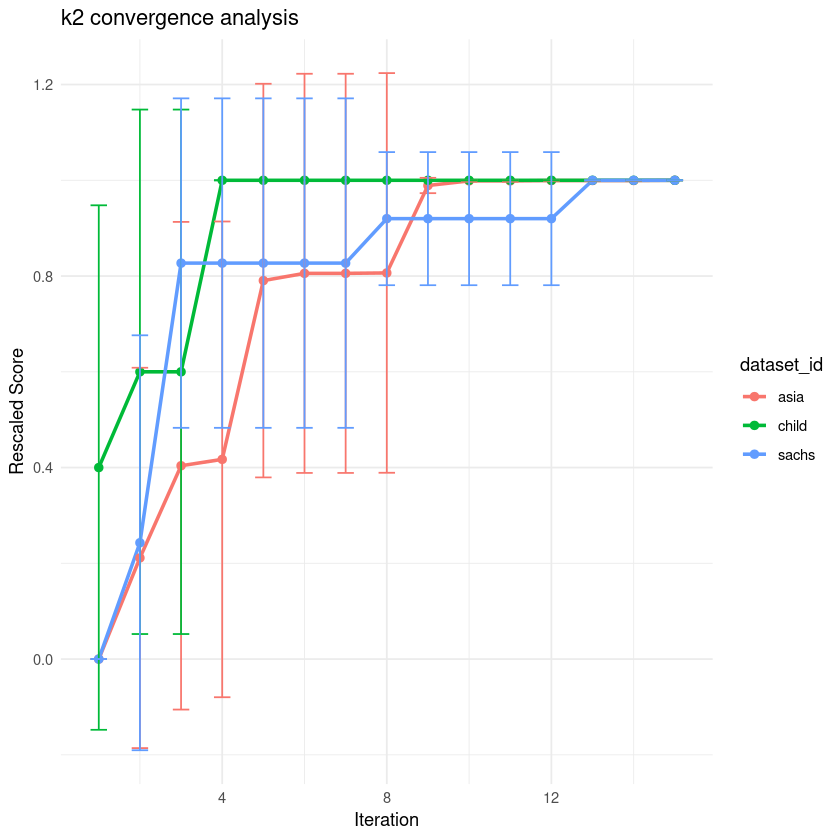

In [43]:
# Plot the analysis about the convergence
ggplot(summary_stats, aes(x = time_point, y = mean_score, color = dataset_id)) +
  geom_line(linewidth = 1) +  # Line plot
  geom_point(size = 2) +  # Points
  geom_errorbar(aes(ymin = mean_score - sd_score, ymax = mean_score + sd_score), 
                width = 0.4) +  # Error bars
  labs(title = "k2 convergence analysis",
       x = "Iteration",
       y = "Rescaled Score") +
  theme_minimal()


### Number of parents

In [34]:
n_realizations <- 5

# Create the long-format data frame
results <- map2_df(
  names(datasets), datasets,
  ~ {
    # Loop over each realization
    map_df(1:n_realizations, function(realization_id) {

      map_df(1:5, function(max_parents) {
        # Generate the scores
        res <- K2_pipeline(.y, max_parents=max_parents, 
                           max_iter=10, mode="local")
        score <- res$score
        
        # Create a data frame for the current realization
        data.frame(
          dataset_id = .x,               # The name of the current dataset
          realization_id = realization_id, # Current realization index
          score = score,            # The scores for each time point
          max_parents = max_parents # The maximum number of parents
        )
      })

    })
  }
)

# Save the data frame to an RDS file
saveRDS(results, file = "./temp_data/parentsK2.rds")

In [55]:
# Load the data frame from the RDS file
results <- readRDS("./temp_data/parentsK2.rds")

In [56]:
# Summarize the results
summary_stats <- results |>
  group_by(dataset_id, max_parents) |>
  summarize(
    mean_score = mean(score),
    sd_score = sd(score),
    .groups = 'drop'
  )

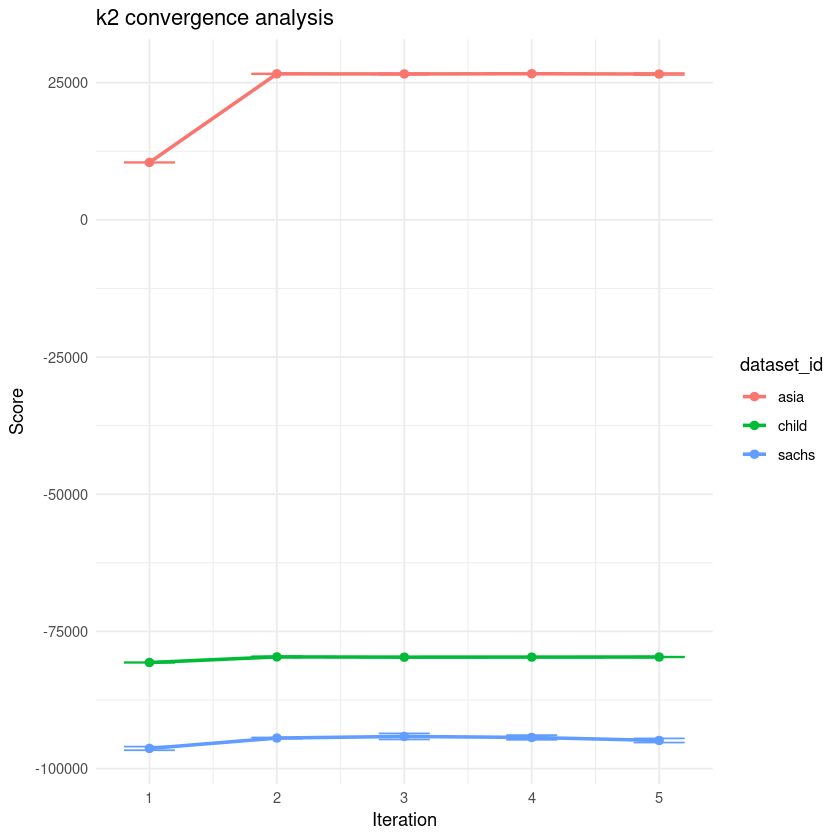

In [58]:
# Plot the analysis about the convergence
ggplot(summary_stats, aes(x = max_parents, y = mean_score, color = dataset_id)) +
  geom_line(linewidth = 1) +  # Line plot
  geom_point(size = 2) +  # Points
  geom_errorbar(aes(ymin = mean_score - sd_score, ymax = mean_score + sd_score), 
                width = 0.4) +  # Error bars
  labs(title = "k2 convergence analysis",
       x = "Iteration",
       y = "Score") +
  theme_minimal()
